In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from pandas.plotting import scatter_matrix
import seaborn as sns

# Display all columns of a dataframe since Pandas truncates information in dataframes
pd.set_option('display.max_columns', None)

In [3]:
# Load heart dataset obtained from Kaggle
data = pd.read_csv('original_heart_data.csv')

# Display top 5 rows of dataset
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
# Identify shape of dataset
print(f"Heart dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Heart dataset has 303 rows and 14 columns


In [6]:
# View all column names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:

# Find the 4 rows with the value of '?'
data[data['ca'] == '?']



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [8]:
# Replace each '?' with NaN as '?' is incorrect for the dataset
data.loc[data['ca'] == '?', 'ca'] = np.NaN
data['ca'] = data['ca'].astype(float).astype('Int64')
data['ca'].unique()

<IntegerArray>
[0, 3, 2, 1, <NA>]
Length: 5, dtype: Int64

In [9]:
# Find the rows with the value of 1, 2, 3 and 4
data[(data['target'] >= 1) & (data['target'] <= 4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [10]:
# Replace each value between 1 and 4 with 1
data[['target']] = data[['target']].replace(dict.fromkeys([1, 2, 3, 4], 1))

data['target'].unique()# Replace each value between 1 and 4 with 1
data[['target']] = data[['target']].replace(dict.fromkeys([1, 2, 3, 4], 1))

data['target'].unique()

array([0, 1], dtype=int64)

In [11]:
# Check for duplicate rows
print(f'Any duplicates? {data.duplicated().values.any()}')
print(f"{data.duplicated().sum()} duplicated rows\n")

Any duplicates? False
0 duplicated rows



In [12]:
# Summary of all columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.0,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.0,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.0,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.0,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.0,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.0,1.000000


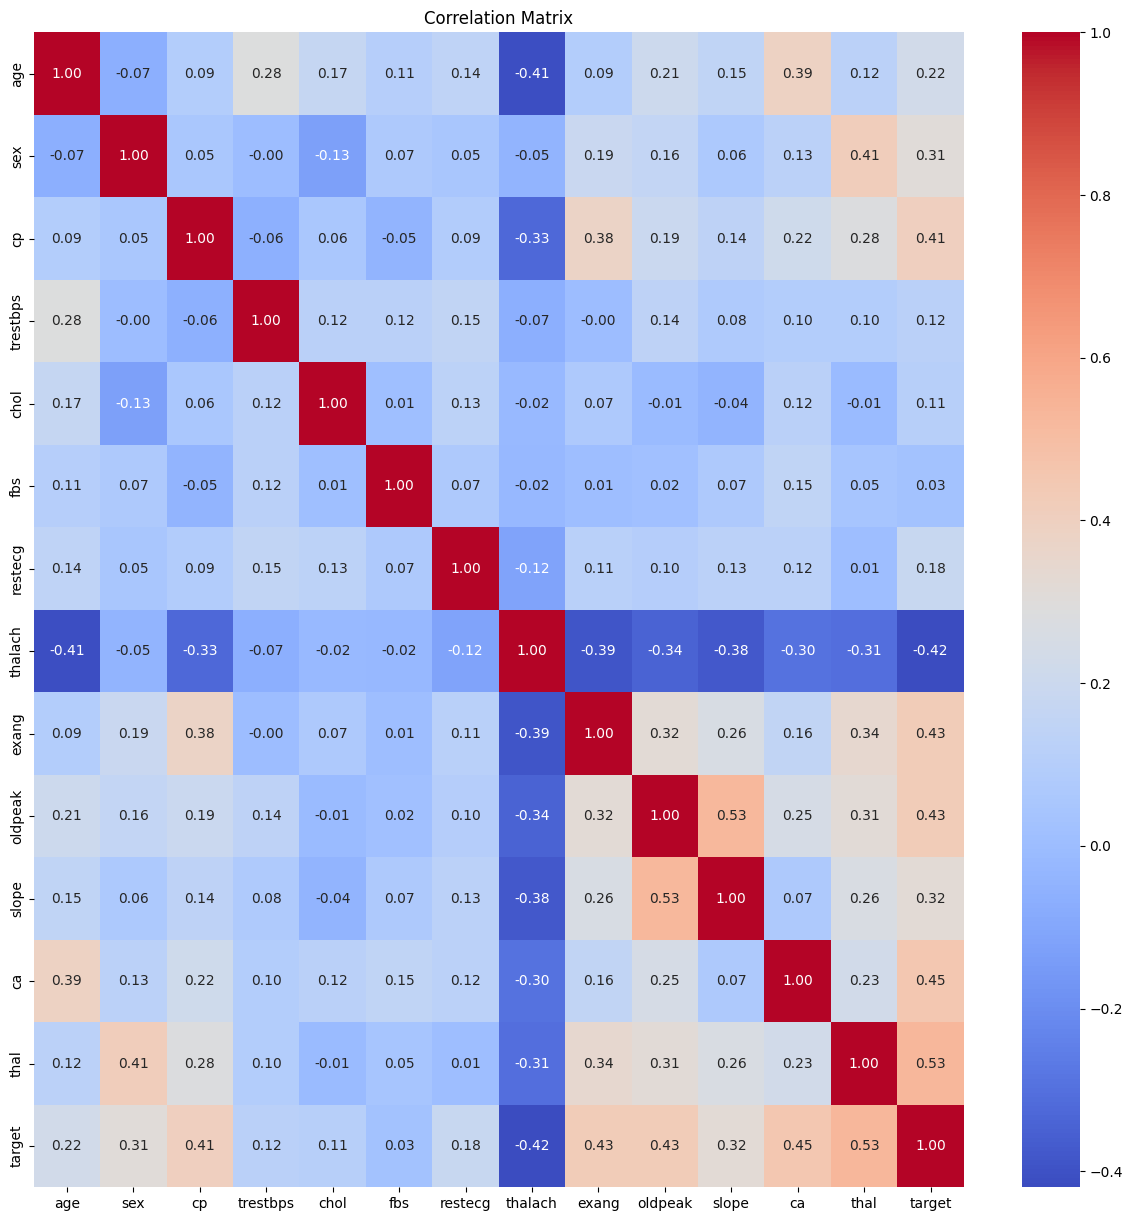

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('heart_data.csv')

# Convert non-numeric values to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_numeric.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

